##일급함수와 고차함수

1. 함수를 변수에 할당할 수 있습니다.
2. 함수를 데이터 구조에 저장할 수 있습니다.
3. 함수를 인자로 다른 함수에 전달할 수 있습니다.
4. 함수를 결과로서 반환할 수 있습니다.

In [ ]:
l = [10, 20, 30]
la = l.append
la(40)
l

[10, 20, 30, 40]

In [ ]:
#함수를 데이터 구조에 저장할 수 있습니다.
def add(x, y):
    return x + y

def subtract(x, y):
    return x - y

funcs = [add, subtract]
print(funcs[0](2, 3))  # 출력: 5

5


In [ ]:
#함수를 인자로 다른 함수에 전달할 수 있습니다 .
def say(name):
    return f'Hello, {name}'

def greet(func, name):
    return func(name)

print(greet(say, 'World'))

Hello, World


In [ ]:
class Operator:
    def add(self, x, y):
        return x + y

    def sub(self, x, y):
        pass

    def mul(self, x, y):
        pass

    def div(self, x, y):
        pass

    def _and(self, x, y):
        pass

    def _or(self, x, y):
        pass

op = Operator()
logical_op = {
    'add' : op.add,
    'sub' : op.sub,
    'mul' : op.mul,
    'div' : op.div,
}
arithmetic_op = {
    '_and': op._and,
    '_or': op._or,
}


print(logical_op['add'](2, 3))  # 출력: 5
print(arithmetic_op['_and'](5, 6))

5
None


In [ ]:
def cat_sound(p):
    x = 10
    y = 10
    z = 10
    j = 10
    p('냐옹')

cat_sound(print) #함수안에 built-in-function인 print를 넣었습니다.

냐옹


In [ ]:
#원의 넓이를 변수에 함수를 넣어서 구하기
def square(x):
    return x**2

def width_circle(r, s):
    return s(r) * 3.14

width_circle(10, square) #10**2 * 3.14

314.0

In [ ]:
#삼각형에서 한 변의 길이 구하기
def square(x):
    return x**2
def root(x):
    return x**(1/2)

def length(a, b, s, r):
    return r(s(a) + s(b))


length(3, 4, square, root)

5.0

In [ ]:
# 함수를 결과로 반환!
def create_adder(x):
    def adder(y):
        return x + y
    return adder

add_5 = create_adder(5)
print(add_5(10))  # 출력: 15

In [ ]:
def create_exponent(x):
    def exponent(y):
        return y ** x
    return exponent

exponent_2 = create_exponent(2)
exponent_3 = create_exponent(3)
print(exponent_2(10)) # 출력: 100
#print(create_exponent(2)(10))  => return y ** 2(상수취급)
print(exponent_3(10)) # 출력: 1000
print(create_exponent(2)(10)) # 출력: 1000

100
1000
100


In [ ]:
def f():
    l = [10, 20, 30]
    print(id(l))
    return l

sample = f()
id(sample) #주소가 같다 함수가 끝나면 변수들이 다 휘발되지 않던가?
# smaple이 l을 참조하고 있기 때문에 변수가 휘발되지 않았음.


132747690323328


132747690323328

In [ ]:
import sys
sys.getrefcount(sample)

3

In [ ]:
#일급함수 : 함수를 일급객체(값, 주소)로 취급
#고차함수 : 함수를 아규먼트로 받거나 return 값으로 반환할 수 있는 함수

## 클로저

휘발되었어야 하는 메모리 영역에 접근하여 데이터(주로 함수)를 활용하는 일

In [ ]:
#고차함수이며, 클로저가 아닌경우
def outer_function():
    def inner_function():
        return 100 + 100
    return inner_function

outer_function()()

200

In [ ]:
#클로저인 경우
def outer_function(x):
    def inner_function(y):
        return x + y
    return inner_function

inner = outer_function(100)
inner(200)

300

위 예제에서 `outer_function`은 `inner_function`을 반환합니다. `inner_function`은 외부 함수의 변수 `x`를 참조하고 있습니다. 따라서, `outer_function`을 호출하고 결과를 `closure`에 저장하면, `closure`는 `inner_function`의 코드와 `x = 100`이라는 상태를 기억하는 클로저가 됩니다.

`closure(5)`를 호출하면 `inner_function(5)`를 호출하는 것과 동일한 결과를 얻게 됩니다. 이는 클로저가 `inner_function`의 코드뿐만 아니라 `x = 100`이라는 상태도 '기억'하고 있기 때문입니다.

## 데코레이터

In [ ]:
def sample_decorator(function):
    def wrapper():
        print('Before the function call')
        function()
        print('After the function call')
    return wrapper



def hello():
    print('Hello, World')

# hello() #데코레이터가 없는 상태에서는 sample_decorator(hello)()와 같습니다.
sample_decorator(hello)()  # => wrapper()



Before the function call
Hello, World
After the function call


In [ ]:
#sample_decorator 핵심 함수에 hello() 라는 부가기능을 넣는 느낌

@sample_decorator
def hello():
    print('Hello, World')
hello()

Before the function call
Hello, World
After the function call


In [ ]:
def data_Preprocessing(function):
    def wrapper(data):
        return function(list(map(int, data)))
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data) / len(data)

mean([1, '2', '3', 4, 5, '77'])

15.333333333333334

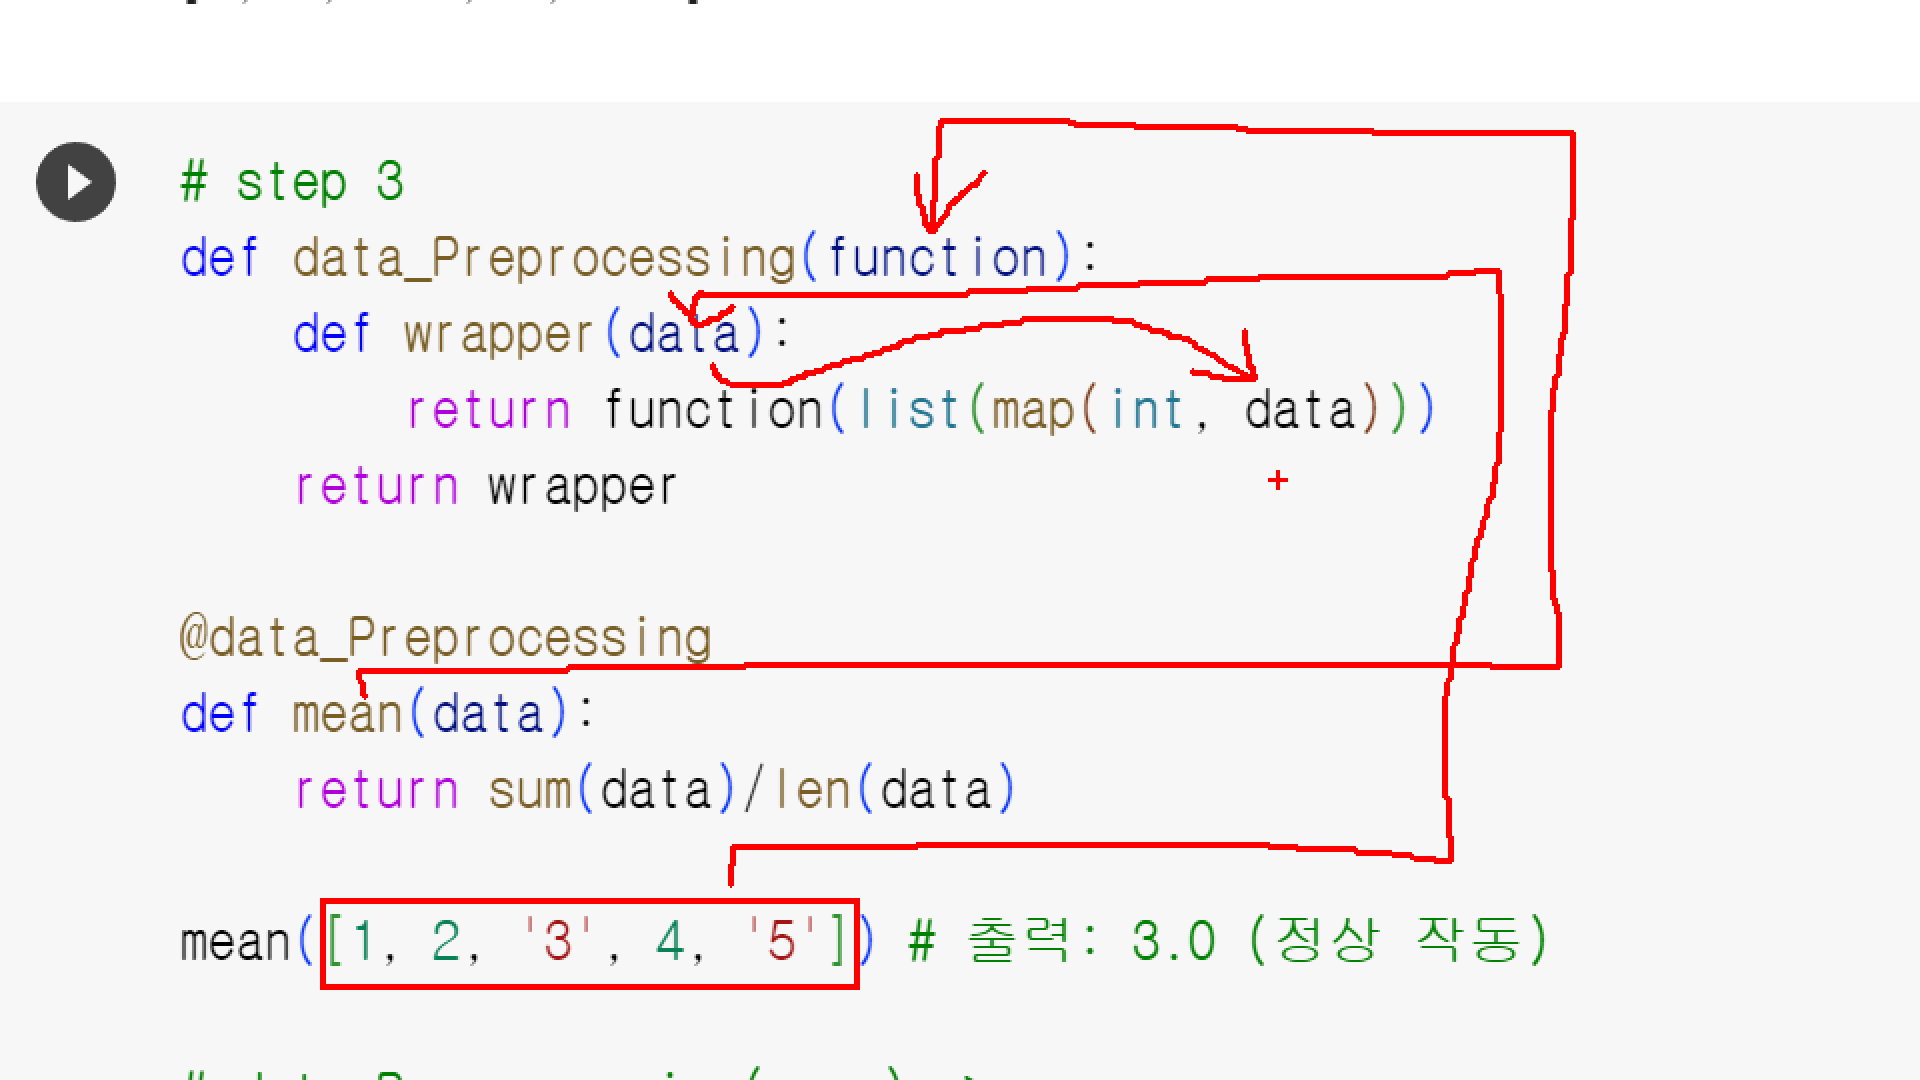

In [ ]:
#직접 짜보기

def data_processing(function):
    def wrapper1(data):
        return function(list(map(int, data)))
    return wrapper1

@data_processing
def average(data):
    return sum(data) / len(data)

c = [1, 2, '3', '4', 5, '10', 20]

average(c)

6.428571428571429

In [ ]:
import sys

def ff():
    l = [10, 20, 30]
    return l

sample_ = ff()
sys.getrefcount(sample_) # window, mac, linux의 출력값이 달라요.
# 중요한 포인트는 getrefcount의 작동 원리가 아니라
# 함수가 종료되어도 참조하는 변수가 있다면
# 값이 사라지지 않는다는 것이 포인트입니다!

2

In [ ]:
# 이런 식으로 우린 사용합니다.
# login한 사용자만 게시판 읽도록
# Django와 같은 프레임웤은 필요한 데코레이터는 미리 구현되어 있습니다.
# 걱정하지 않으셔도 됩니다.
def login(arg):
    pass

@login
def 게시판읽기():
    pass

In [ ]:
def add_exclamation(function):
    def wrapper(text):
        print(f'add_exclamation 데코레이터 시작')
        result = function(text) + "!"
        print(f'add_exclamation 데코레이터 종료')
        return result
    return wrapper

def add_question_mark(function):
    def wrapper(text):
        print(f'add_question_mark 데코레이터 시작')
        result = function(text) + "?"
        print(f'add_question_mark 데코레이터 종료')
        return result
    return wrapper

def add_dot(function):
    def wrapper(text):
        print(f'add_dot 데코레이터 시작')
        result = function(text) + "."
        print(f'add_dot 데코레이터 종료')
        return result
    return wrapper

@add_exclamation
@add_question_mark
@add_dot
def say(anytext):
    return anytext

c = say('hello 123')
print(c)

add_exclamation 데코레이터 시작
add_question_mark 데코레이터 시작
add_dot 데코레이터 시작
add_dot 데코레이터 종료
add_question_mark 데코레이터 종료
add_exclamation 데코레이터 종료
hello 123.?!


In [ ]:
#데코레이터를 감싸는 하나의 함수를 더 만들어서 아규먼트를 받는 방법입니다.
def add():
    def decorator(function):
        def new_function(a, b):
            print(f'plus함수가 {function(a, b)}만큼 증가시키는 데코레이터 실행')
            result = function(a, b)
            print(result)
            print(f'plus함수가 {function(a, b)}만큼 증가시키는 데코레이터 종료')
            return result
        return new_function
    return decorator

@add()
def plus(a, b):
    print('plus함수 호출')
    return a + b

nums1 = plus(10, 20)
print(f'nums1 : {nums1}')

plus함수 호출
plus함수가 30만큼 증가시키는 데코레이터 실행
plus함수 호출
30
plus함수 호출
plus함수가 30만큼 증가시키는 데코레이터 종료
nums1 : 30


In [ ]:
def plus(a, b):
    print('plus 함수가 호출되었습니다.')
    return a + b

def add(n):
    def decorator(f):
        def wrapper(a, b):
            print(f'plus 함수가 {n}만큼 증가시키는 데코레이터가 시작됩니다.')
            result = f(a, b)
            print(result)
            print(f'plus 함수가 {n}만큼 증가시키는 데코레이터가 종료됩니다.')
            return result + n
        return wrapper
    return decorator

# d = add(1000)
# w = d(plus)
# w(10, 20)

add(1000)(plus)(10, 20)

plus 함수가 1000만큼 증가시키는 데코레이터가 시작됩니다.
plus 함수가 호출되었습니다.
30
plus 함수가 1000만큼 증가시키는 데코레이터가 종료됩니다.


1030

## lambda

In [ ]:
square = lambda x: x*x
print(square(5))

25


In [ ]:
import numpy
#재사용되는 코드
def 제곱(x):
    return x * x

list1 = [1, 2, 3]
list2 = [numpy.arange(0, 20, 0.5)]
print(list(map(제곱, list1)))
print(list(map(제곱, list2)))

[1, 4, 9]
[array([0.0000e+00, 2.5000e-01, 1.0000e+00, 2.2500e+00, 4.0000e+00,
       6.2500e+00, 9.0000e+00, 1.2250e+01, 1.6000e+01, 2.0250e+01,
       2.5000e+01, 3.0250e+01, 3.6000e+01, 4.2250e+01, 4.9000e+01,
       5.6250e+01, 6.4000e+01, 7.2250e+01, 8.1000e+01, 9.0250e+01,
       1.0000e+02, 1.1025e+02, 1.2100e+02, 1.3225e+02, 1.4400e+02,
       1.5625e+02, 1.6900e+02, 1.8225e+02, 1.9600e+02, 2.1025e+02,
       2.2500e+02, 2.4025e+02, 2.5600e+02, 2.7225e+02, 2.8900e+02,
       3.0625e+02, 3.2400e+02, 3.4225e+02, 3.6100e+02, 3.8025e+02])]


In [ ]:
#재사용되지 않는 코드
print(list(map(lambda x:x**2, [1, 2, 3])))

[1, 4, 9]


In [ ]:
#이런 형태는 오늘 보고 끝입니다.
result = lambda x: x**2
print(result(3))

result = (lambda x : x ** 2)(3) #x에 바로 3 대입
print(result)  # 출력: 9


9
9


## args, kargs

In [ ]:
a, b, *c = 10, 20, 30, 40, 50
a, b, c

(10, 20, [30, 40, 50])

In [ ]:
def print_args(a, b, *args): # *args뒤에 일반 변수를 선언하지 못합니다.
    print(args)
    for x in args:
        print(x)

print_args(100, True, 'Licat', 'hello', 200)
print_args(100, True) #없어도 출력됨 => ()

('Licat', 'hello', 200)
Licat
hello
200
()


In [ ]:
def print_kwargs(a, **kwargs): #key와 value를 모두 넘기기위해 ** 두개 사용
    print(a)
    print(kwargs)
    for i in kwargs:
        print(i)

print_kwargs(100, name='Licat', age='10')

100
{'name': 'Licat', 'age': '10'}
name
age


In [ ]:
def print_args(**args):
    for i in args:
        print(i)
        print(args[i])

print_args(name='Licat', age='10')


name
Licat
age
10


In [ ]:
def func(a, b, *, c, d):  #* 뒤에건 키를 정해서 전달해줘야함
    print(a, b, c, d)

func(1, 2, c = 3, d = 4)  # 올바른 예시
# func(1, 2, 3, d = 4)  # 잘못된 예시
# func(1, 2, 3, 4)    # 잘못된 예시

1 2 3 4


In [ ]:
#args 와 keywordargs 차이
def func(a, b, c):
    print(a, b, c)

args = (1, 2, 3)
func(*args)

kwargs = {'a': 1, 'b': 2, 'c': 3}
func(**kwargs)

1 2 3
1 2 3


In [ ]:
kwargs = {'a': 1, 'b': 2, 'c': 3}
func(**kwargs)
print(kwargs, *kwargs)
print(kwargs, **kwargs) #errror 왜 에스터리스크가 2개일 때 error가 날까요
print(kwargs, {'a' = 1, 'b' = 2, 'c' = 3}) #이 코드가 바로 위의 코드와 같습니다.

SyntaxError: ignored

In [ ]:
# a=1, b=2, c=3 => **kwargs => {'a' = 1, 'b' = 2, 'c' = 3}


def function(a=100, **kwargs):
    print(a, kwargs)

function(200, asd=3, b=2, c=3)

200 {'asd': 3, 'b': 2, 'c': 3}


In [ ]:
# 반대로 {'a' = 1, 'b' = 2, 'c' = 3} => **kwargs => a=1, b=2, c=3

def function(a, b, c):
    print(a, b, c)


args = {'a' : 1, 'b' : 2, 'c' : 3, 'd' : 2 }
function(*args[:2])


TypeError: ignored

## 이터레이터, 제너레이터

### 이터레이터

In [ ]:
class MyIterator:
    def __init__(self, stop):
        self.current_value = 0  # 현재 값
        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

for i in my_iterator:
    print(i)

#초기화가 되지않아 순회가 돌지 않습니다.
for i in my_iterator:
    print(i)

0
1
2
3
4


In [ ]:
class MyIterator:
    def __init__(self, stop):
        self.current_value = 0  # 현재 값
        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

In [ ]:
#for 문이 도는방법 next로 계속 나가다가 stopiteration에러를 만나면 for문 종료
i = iter(my_iterator)
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))

0
1
2
3
4


StopIteration: ignored

### 제너레이터

In [ ]:
def my_generator(data):
    for i in data:
        yield i * 10

for i in my_generator([1, 2, 3]):
    print(i)

10
20
30


In [ ]:
#이럴 때 많이 사용합니다.
import random
def my_generator():
    l = ['홀', '짝']
    r = ''
    while True:
        r = random.choice(l)
        yield r

try1 = 10

result = list(zip(range(try1),'하이 요 hello123', my_generator())) #zip 이터레이터가 셋중 하나라도 종료될때까지 next
result

[(0, '하', '짝'),
 (1, '이', '짝'),
 (2, ' ', '홀'),
 (3, '요', '짝'),
 (4, ' ', '짝'),
 (5, 'h', '홀'),
 (6, 'e', '홀'),
 (7, 'l', '짝'),
 (8, 'l', '짝'),
 (9, 'o', '짝')]

In [ ]:
gen = (i for i in range(2, 11, 2))
for i in gen:
    print(i)

2
4
6
8
10


## 연습문제
회전초밥집에 들어갔습니다. 초밥은 아래와 같은 양식으로 나옵니다.

[['광어초밥', 1000], ['연어초밥', 2000], ['계란초밥', 3000]]

각 초밥은 몇 개 나올지 알 수 없습니다.
각 초밥은 1000원씩 비싸집니다.
초밥에 '어'가 나오는 초밥만 먹습니다

내가 먹은 초밥의 비용을 계산하는 코드를 작성해주세요.


In [ ]:
import random
from collections import Counter
sushi = [
    ['광어초밥', 1000],
    ['연어초밥', 2000],
    ['계란초밥', 3000],
    ['문어초밥', 4000],
    ['장어초밥', 4000]
    ]
eated = []

def HowManyEat():
    eatcount = random.randint(1, 10)
    filter = []
    for i in range(eatcount):
        filter.append(random.choice(sushi)[0])

    for i in filter:
        if '어' in i:
            eated.append(i)
    print(f'나는 {filter}초밥중, \n {eated}초밥을 먹었어. \n 총 {len(eated)}개 먹었어.')


def totalcost():
    HowManyEat()
    cost = 0
    menu = {}
    for shusi_cost in sushi:
        menu[shusi_cost[0]] = shusi_cost[1]
    #먹은 갯수 세기
    eated_counter = Counter(eated)

    for i in eated:
        cost = cost + menu.get(i)
    for eat, count in eated_counter.items():
        if count > 1:
            cost = cost + (count-1)*1000
    print(f'총 {cost}원이야.')

totalcost()


나는 ['장어초밥', '광어초밥', '광어초밥', '계란초밥', '장어초밥']초밥중, 
 ['장어초밥', '광어초밥', '광어초밥', '장어초밥']초밥을 먹었어. 
 총 4개 먹었어.
총 12000원이야.


In [ ]:
def gen(data):
    for name, price in data:
        if '어' in name:
            yield price

def solution(data):
    return sum(gen(data))

solution([['광어초밥', 1000], ['연어초밥', 2000], ['계란초밥', 3000], ['문어초밥', 4000], ['장어초밥', 5000]])

12000

## nonlocal

In [ ]:
x = 100
def outer():
    x = 1
    def inner():
        nonlocal x
        x += 1
        print(x)
    inner()
    print(x)

outer()
print(x)

2
2
100


## zip이 사라지는 이유

In [ ]:
a = [1, 2, 3]
b = ['a', 'b', 'c']

z = zip(a, b)
print(list(z)) # [(1, 'a'), (2, 'b'), (3, 'c')]

# zip 객체는 한 번 사용되었으므로 빈 리스트가 반환됩니다.
print(list(z)) # []

[(1, 'a'), (2, 'b'), (3, 'c')]
[]


In [ ]:
x = [1, 2, 3]
y = sorted(x)

for i in y:
    print(i)

for i in y:
    print(i)

y # 심지어 리스트로 나옵니다!? zip, map 너무 차별하는 것 아닐까요?

1
2
3
1
2
3


[1, 2, 3]

In [ ]:
aa = sorted(range(2, 1000, 12))
aa
#sorted는 메모리에 많은 부하를 줌. 사용에 주의하세요.

## 연습문제

In [ ]:
# 문제1
# 다음과 같이 동작하는 제너레이터 함수 fibonacci(n)를 완성하세요.
# 주어진 숫자 n까지의 피보나치 수열을 반환합니다.
# 인터넷에서 피보나치 순열 Python 코드를 검색해보셔도 좋습니다.

def fib(n):
    pass

for i in fib(5):
    print(i)

'''
출력
1
1
2
3
5
'''

# 문제2
# 주어진 함수의 실행 시간을 측정하여 출력하는 데코레이터 time_it를 작성하세요.
# (힌트: time 모듈의 time() 함수를 사용하세요.)

In [ ]:
# value swap
# pre, next = next, temp
# 다른언어
temp = a
a = b
b = temp
# 파이썬
a, b = b, a

In [ ]:
# 문제1
# 다음과 같이 동작하는 제너레이터 함수 fibonacci(n)를 완성하세요.
# 주어진 숫자 n까지의 피보나치 수열을 반환합니다.

def fib(n):
    pre = 1
    next = 1
    count = 0
    while True:
        temp = pre + next
        yield pre
        pre, next = next, temp
        count += 1
        if count == n:
            break

for i in fib(5):
    print(i)

'''
출력
1
1
2
3
5
'''

# 문제2
# 주어진 함수의 실행 시간을 측정하여 출력하는 데코레이터 time_it를 작성하세요.
# (힌트: time 모듈의 time() 함수를 사용하세요.)

import time

def time_it(func):
    def wrapper():
        start_time = time.time()
        func()
        end_time = time.time()
        print(f"{end_time - start_time:.4f}s")
    return wrapper

@time_it
def main():
    def fib(n):
        pre = 1
        next = 1
        count = 0
        while True:
            temp = pre + next
            yield pre
            pre, next = next, temp
            count += 1
            if count == n:
                break

    for i in fib(20):
        print(i)

main()

## 파이썬의 버전별 문법

In [ ]:
# 3.6
def greet(name: str) -> str:
    return f'Hello, {name}'

greet(10)

In [ ]:
# 3.6
def greet(name):
    '''
    인사를 하는 함수입니다.

    이 함수는 name 인자로 받아 name과 함께 인사를 하는 함수입니다~~

    Args:
        a(str): 블라블라
        b(int): 블라블라

    Returns:
        리턴은 이런식입니다.
        example: [1, 2, 3]

    Raises:
        IOError: 애러 블라블라
    '''
    return f'Hello, {name}'

greet(10) #마우스를 올려보세요
greet.__doc__

'\n    인사를 하는 함수입니다.\n\n    이 함수는 name 인자로 받아 name과 함께 인사를 하는 함수입니다~~\n\n    Args:\n        a(str): 블라블라\n        b(int): 블라블라\n\n    Returns:\n        리턴은 이런식입니다.\n        example: [1, 2, 3]\n\n    Raises:\n        IOError: 애러 블라블라\n    '

In [ ]:
# 3.7
from dataclasses import dataclass

@dataclass
class User:
    id: int
    name: str
    email : str

user = User(123, 'hojun', 'hojun@gmail')
user

In [ ]:
# 3.8 왈러스 연산자
(x := 10) * 3

30

In [ ]:
# 3.9
#딕셔너리 결합 연산자
x = {'key1' : 'value1'}
y = {'key2' : 'value2'}
z = x | y
z

{'key1': 'value1', 'key2': 'value2'}

In [ ]:
# {"key1": "value1"} + {"key2": "value2"}
# {"key1": "value1"}.append({"key2": "value2"})
x = {"key1": "value1"}
x.update({"key2": "value2"})
x

{'key1': 'value1', 'key2': 'value2'}

In [ ]:
# 아래와 같은 딕셔너리 언패킹은 3.5버전에서 나온 기능입니다.
x = {"key1": "value1"}
y = {"key2": "value2"}
z = {**x, **y}
z

{'key1': 'value1', 'key2': 'value2'}

In [ ]:
# 3.10
#구조적 패턴 매칭
# 간단한 버전
str_test = "happy"

match str_test:
    case "happy":
        print("happy")

    case "good":
        print("good")

    case "bad":
        print("bad")

happy


In [ ]:
# Enum 사용
from enum import Enum

class Test(Enum): # Enum을 상속받은 class 정의
	ENTER  = 1
	QUIT = 0

test = Test(1) # ENTER 값을 가진 class 객체 생성

match test:
	case Test.ENTER:
		print("enter")

	case Test.QUIT:
		print("quit")

In [ ]:
# 리스트 사용
test = ["quit","good"]
match test:
		# 리스트 내부에 quit이라는 문자열만 있는 지 확인,
		# 이외에 다른 값이 있을 경우 매칭이 되지 않습니다.
    case ["quit"]:
        quit()
		# 리스트 첫 번째 요소가 문자열 load인지 판단합니다.
    # filename이라는 변수는 체크하지 않고 값을 가져와 사용합니다.
    case ["load", filename]:
        print(f"Loading {filename}")
		# 모든 케이스가 매칭이 되지 않을 경우 최종적으로 수행하는 매칭되는 구문입니다.(와일드 카드)
    case _:
        print ("기본값")

In [ ]:
# 패턴 예시

case "test" # 단일 값 "test"에 매칭
case ["a","b"] # ["a","b"]라는 컬렉션에 매칭
case ["a", value] : # 두 개의 값이 있는 컬렉션에 매칭하고, 두 번째 값을 캡처 변수 value에 저장
case ("a"|"b"|"c") : # or 연산자(|)를 사용해서 하나의 case 블록에서 여러 case를 처리, "a","b" 또는 "c"에 매칭
case ["z", _] # "z"로 시작하는 모든 컬렉션을 매칭

## 파일 입출력

In [ ]:
# open(파일이름, 파일모드)
f = open('python.txt', 'w') #파일모드 r, w, a

#파일모드
# r(읽기모드)
# w(쓰기모드, 파일이 없으면 생성합니다. 내용이 있어도 w모드면 덮어씁니다.)
# a(추가모드)
f.close()

In [ ]:
f = open('python.txt', 'w')
s= ''
for i in range(1, 6):
    s += f'{i}명 참여 중입니다. \n'
f.write(s)
f.close()

In [ ]:
f = open('python.txt', 'r')
while True:
    line = f.readline()
    if not line:
        break
    print(line)
f.close()

1명 참여 중입니다. 

2명 참여 중입니다. 

3명 참여 중입니다. 

4명 참여 중입니다. 

5명 참여 중입니다. 



In [ ]:
f = open('python.txt', 'r')
lines = f.readlines()
for line in lines:
    print(lines)
    print(line)
f.close()

['1명 참여 중입니다. \n', '2명 참여 중입니다. \n', '3명 참여 중입니다. \n', '4명 참여 중입니다. \n', '5명 참여 중입니다. \n']
1명 참여 중입니다. 

['1명 참여 중입니다. \n', '2명 참여 중입니다. \n', '3명 참여 중입니다. \n', '4명 참여 중입니다. \n', '5명 참여 중입니다. \n']
2명 참여 중입니다. 

['1명 참여 중입니다. \n', '2명 참여 중입니다. \n', '3명 참여 중입니다. \n', '4명 참여 중입니다. \n', '5명 참여 중입니다. \n']
3명 참여 중입니다. 

['1명 참여 중입니다. \n', '2명 참여 중입니다. \n', '3명 참여 중입니다. \n', '4명 참여 중입니다. \n', '5명 참여 중입니다. \n']
4명 참여 중입니다. 

['1명 참여 중입니다. \n', '2명 참여 중입니다. \n', '3명 참여 중입니다. \n', '4명 참여 중입니다. \n', '5명 참여 중입니다. \n']
5명 참여 중입니다. 



In [ ]:
f = open('python.txt', 'r')
data = f.read()
print(data)
f.close()

1명 참여 중입니다. 
2명 참여 중입니다. 
3명 참여 중입니다. 
4명 참여 중입니다. 
5명 참여 중입니다. 



In [ ]:
data

'1명 참여 중입니다. \n2명 참여 중입니다. \n3명 참여 중입니다. \n4명 참여 중입니다. \n5명 참여 중입니다. \n'

In [ ]:
#html 작성
f = open('python.html', 'w')
s = '''<html>
<head>
</head>
<body>
<h1>Hello, World</h1>
</body>
</html>
'''

f.write(s)
f.close()

In [ ]:
# 쉬운예제
f = open('python.csv', 'w', encoding = 'utf-8')
s = '''제목, 평점, 이미지, 줄거리
무빙, 5.0, img, 줄거리
무빙, 5.0, img, 줄거리
무빙, 5.0,      img, 줄거리
무빙, 5.0, img, 줄거리
'''

f.write(s)
f.close()

In [ ]:
# 어려운 예제
# django의 동작원리와도 관련이 있습니다.
import requests
from bs4 import BeautifulSoup

paullab_url = 'http://paullab.co.kr/bookservice/'
response = requests.get(paullab_url)
response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

bookservices = soup.select('.col-lg-6 > h2')     # col-lg-6 클래스 안의 h2 태그 탐색
contents = ''

for no, book in enumerate(bookservices, 1):
    contents += f'''
                <section>
                <h2>{no}. {book.text}</h2>
                <img src=''>
                </section>
                '''

# 이미지 양식: https://paullab.co.kr/bookservice/img/notion.jpg
f = open('python.html', 'w')
s = f'''<html>
<head>
</head>
<body>
{contents}
</body>
</html>
'''
f.write(s)
f.close()

In [ ]:
#내용 수정 a
f = open('python.txt', 'a')
s = ''
for i in range(6, 11):
    s += f'{i}명 참여 중입니다. \n'
f.write(s)
f.close()

In [ ]:
#파일 열기와 닫기를 동시에
with open('test.txt', 'w') as f:
    내용 = 'Life is too short, you need python'
    f.write(내용)

In [ ]:
f = open('python.txt', 'w+') #읽기 쓰기(기존에 있던 내용은 덮어쓰기)
lines = f.readlines()
for line in lines:
    print(line, end ='')
f.close()

In [ ]:
f = open('python.txt', 'r+') #읽기 쓰기 (기존에 있던 내용을 읽을 수 있고, 최종적으로는 덮어씀 )
lines = f.readlines()
for line in lines:
    print(line, end ='')
f.close()

In [ ]:
f = open('python.txt', 'a+') #읽기 없으면 파일추가
lines = f.readlines()
for line in lines:
    print(line, end ='')
f.close()

## 비트연산

In [ ]:
#비트의 and 연산
5 & 12

# 00000101 == 5
# 00001100 == 2
# ----------
# 00000100 ==> 4

4

In [ ]:
#비트의 or 연산
5 | 12

# 00000101 == 5
# 00001100 == 12
# ----------
# 00001101 == 13

13

In [ ]:
# 쉬프트 연산
7 << 2

#00000111
#00011100 (16 + 8 + 4)

28

In [ ]:
# -(n + 1)가 n의 보수
~20

-21

In [ ]:
num = 3.14159
print(f"{num:.2f}")  # 출력: 3.14

name = "Alice"
print(f"{name:>10}")  # 출력:      Alice

3.14
     Alice


## f-string

In [ ]:
value = 'hello'
print(f'{value}')
print(f'{{value}}')
print(f'{{{value}}}')
print(f'{{{{value}}}}')
print(f'{{{{{value}}}}}')
print(f'{{{{{{value}}}}}}')
print(f'{{{{{{{value}}}}}}}')

hello
{value}
{hello}
{{value}}
{{hello}}
{{{value}}}
{{{hello}}}


In [ ]:
def solution(a, b ,included):
    result = a
    include = []
    for i in included:
        included.append(i)

    for i in range(len(included)):
        if included[i] == True:
            result += b * (i )

    return result

solution(7,1, [False, False, False, True, False, False, False])

KeyboardInterrupt: ignored

In [ ]:
value = 'hello'
# print(f'{value + 'world'}') error
print(f'{value + "world"}')
print(f'{10 + 10}') #중괄호 안에서 연산을 하는것은 권장하지 않습니다.

helloworld
20


In [ ]:
a = 10
b = 20

# case1
two_numbers_mul = a * b # 굳이 변수 1개를 더 생성할 필요가 있을까?
print(f'{two_numbers_mul}')

# case2
print(f'{a * b}') # 간단하니까 이걸로 사용하자!
# 코드가 복잡해지면 가독성에서 차이가 납니다.

In [ ]:
 #중괄호 안에서 연산을 하는것은 권장하지 않습니다.

 a = 10
 b = 20

 #case1
 two_numbers_mul = a * b
 two_numbers_add = a + b
 two_numbers_mul_add = two_numbers_mul * two_numbers_add
 print(f'{two_numbers_mul_add}') # 변수명으로 어떤 역할을 하는지 유추할 수 있습니다.

# case2
print(f'{(a * b) * (a + b)}') # 이 값이 무엇을 의미하는지 모릅니다.
# 코드가 복잡해지면 가독성에서 차이가 납니다.

6000
6000


In [ ]:
# 파이썬(Python) 3 포맷팅 방식
print('나의 이름은 {}입니다'.format('한사람'))
print('나의 이름은 {0}입니다. 나이는 {1}세이고 성별은 {2}입니다.'.format('한사람',33,'남성'))
print('나이는 {1}세이고 성별은 {2}입니다. 나의 이름은 {0}입니다. '.format('한사람',33,'남성'))
print('나이는 {age}세이고 성별은 {gender}입니다. 나의 이름은 {name}입니다.'.format(name='한사람',age=33,gender='남성'))
print('만세삼창 :  {0}!!! {0}!!! {0}!!! '.format('만세'))
print('삼삼칠 박수 :  {0}!!! {0}!!! {1}!!! '.format('짝'*3,'짝'*7))
print('-' * 40)

# 파이썬(Python) 3.6 f-string 방식
something = '볼펜'
EA = 2
one_length = 5.343
scale = 'cm'

print(f'{something} {EA}개의 길이는 {one_length*EA}{scale} 입니다.')
print(f'{something} {EA}개의 길이는 {one_length*EA:ㅁ>20.1f}{scale} 입니다.')
print(f'{something} {EA}개의 길이는 {round(one_length*EA, 2)}{scale} 입니다.')

나의 이름은 한사람입니다
나의 이름은 한사람입니다. 나이는 33세이고 성별은 남성입니다.
나이는 33세이고 성별은 남성입니다. 나의 이름은 한사람입니다. 
나이는 33세이고 성별은 남성입니다. 나의 이름은 한사람입니다.
만세삼창 :  만세!!! 만세!!! 만세!!! 
삼삼칠 박수 :  짝짝짝!!! 짝짝짝!!! 짝짝짝짝짝짝짝!!! 
----------------------------------------
볼펜 2개의 길이는 10.686cm 입니다.
볼펜 2개의 길이는 ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ10.7cm 입니다.
볼펜 2개의 길이는 10.69cm 입니다.


In [ ]:
print('Python is [{:15}]'.format('good')) # 양식 같음, 자료형만 다름
print('Python is [{:<15}]'.format('good'))
print('Python is [{:>15}]'.format('good'))
print('Python is [{:^15}]'.format('good'))
print('Python is [{:-^15}]'.format('good'))
print('당신의 나이는 [{:15}]세'.format(22)) # 양식 같음, 자료형만 다름
print('당신의 나이는 [{:<15}]세'.format(22))
print('당신의 나이는 [{:>15}]세'.format(22))
print('당신의 나이는 [{:^15}]세'.format(22))
print('-' * 40)

Python is [good           ]
Python is [good           ]
Python is [           good]
Python is [     good      ]
Python is [-----good------]
당신의 나이는 [             22]세
당신의 나이는 [22             ]세
당신의 나이는 [             22]세
당신의 나이는 [      22       ]세
----------------------------------------


In [ ]:
char_a = '5'
int_a = 5
sample = 1234567890

print(1234567890)
print(f'{sample:>5}') # >는 오른쪽정렬
print(f'{char_a:>5}') # >는 오른쪽정렬
print(f'{char_a:<5}') # <는 왼쪽정렬
print(f'{char_a:^5}') # ^는 가운데정렬
print(f'{int_a:0<5}')# <는 왼쪽정렬, 빈자리를 0으로 채울수도 있음
print(f'{int_a:^10.2f}') # ^ 가운데 정렬하면서 float 타입지정

1234567890
1234567890
    5
5    
  5  
50000
   5.00   


In [ ]:
int_a = 5
print(f'{int_a:0<5}') # <는 왼쪽정렬, 빈자리를 0으로 채울수도 있음
print(f'{int_a:0>5}') # <는 왼쪽정렬, 빈자리를 0으로 채울수도 있음

'12345'.zfill(10)

50000
00005


'0000012345'

In [ ]:
# 문제1: 1 ~ 9 까지 더하는 프로그램
def add_1_to_9():
    return sum(range(1,10))
print(add_1_to_9())

# 문제2: 1 ~ 9 까지 홀수의 합
def add_1_to_9_odd():
    othersol1 = sum([i for i in range(1, 10, 2)])
    othersol2 = sum(filter(lambda x:x % 2 == 1, range(10)))
    othersol3 = 0
    for i in range(10):
        if i % 2 == 1:
            othersol3 += i
    return sum(range(1,10,2))
print(add_1_to_9_odd())
# 문제3: 1000 미만의 자연수에서 3의 배수와 5의 배수의 총합을
#구하는 프로그램을 작성

def solution():
    return sum(i for i in range(1000) if i % 3 == 0 or i % 5 == 0)
print(solution())

45
25
233168


In [ ]:
f = open('python.txt', 'w+') # 읽기 쓰기(기존에 있던 내용은 덮어쓰기)
f.seek(0) # 커서를 앞으로 보냈음에도 기존에 텍스트를 읽지 못합니다.
print(f.read())
f.write('\nw+모드입니다!') # 그냥 덮어 써버림
f.seek(0) # 쓴 내용을 읽을 수는 있음!
print(f.read())
f.close()
# 차이:
# r+ 모드는 파일을 열 때 기존의 내용을 보존
# w+ 모드는 파일을 열 때 기존의 내용을 삭제



w+모드입니다!


In [ ]:
# 문제4: 아래 메트릭스를 모두 더해주세요.
m = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# sum(m)
sum(sum(m, []))

45

In [ ]:
sum([1, 2, 3], 100)
sum([[1, 2, 3], [4, 5, 6], [7, 8, 9]], [])
# [1, 2, 3] + [] == [1, 2, 3]
# [4, 5, 6] + [1, 2, 3] == [4, 5, 6, 1, 2, 3]
# [7, 8, 9] + [4, 5, 6, 1, 2, 3] == [7, 8, 9, 4, 5, 6, 1, 2, 3]

In [ ]:
import numpy as np
# 수학 수식에 막강한 성능을 자랑합니다.
# 수학 수식 관련해서 파이썬보다 속도도 훨~~~~씬 빠르고 기능도 많아요.

np.sum([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

45

In [ ]:
import collections

s = "Hello, World! This is a sample string for testing purposes."
# s = s.replace(',', '').replace('!', '').replace('.', '')
table = str.translate(',!.', '   ')
s.translate(table)
collections.Counter(s)
# collections.Counter(s).most_common

In [ ]:
import collections
d = {}
s = "Hello, World! This is a sample string for testing purposes."

#풀이 1 for문으로 돌아가면서 곂치면 카운트 1추가
for i in s:
    if i in d:
        d[i] += 1
    else:
        d[i] = 1

# 풀이2, set으로 만들어서 count를 한다.
s = "Hello, World! This is a sample string for testing purposes."
for i in set(s):
    d[i] = s.count(i)
d


{'H': 1,
 'e': 4,
 'l': 4,
 'o': 4,
 ',': 1,
 ' ': 9,
 'W': 1,
 'r': 4,
 'd': 1,
 '!': 1,
 'T': 1,
 'h': 1,
 'i': 4,
 's': 7,
 'a': 2,
 'm': 1,
 'p': 3,
 't': 3,
 'n': 2,
 'g': 2,
 'f': 1,
 'u': 1,
 '.': 1}

In [ ]:
# 문제6 트리만들기

for i in range(1, 10):
    print(' '* (10-i) + ('*' * (2 * i - 1)))

for i in range(1, 10):
    print(f"{'*' * (2 * i-1):^20}")

         *
        ***
       *****
      *******
     *********
    ***********
   *************
  ***************
 *****************
         *          
        ***         
       *****        
      *******       
     *********      
    ***********     
   *************    
  ***************   
 *****************  


In [ ]:
# 다음 자료구조 클래스를 만들어주세요.
# 데이터는 <1, 2, 3, 4> 형식으로 숫자만 저장됩니다.
# print()를 하면 <1, 2, 3, 4>와 같이 출력이 되어야 합니다.
# 메서드는 append, remove 가 있습니다.
# <1, 2, 3, 4> + <1, 2, 3, 4> == <2, 4, 6, 8>과 같이 같은 순서에 요소를 더합니다.
# <1, 2, 3, 4> - <1, 2, 1, 2> == <0, 0, 2, 2>과 같이 같은 순서에 요소를 뺍합니다.
# <1, 2, 3, 4> * 3 = <3, 6, 9, 12>가 됩니다.

class OperList():
    def __init__(self, *nums):
        self.nums = list(nums)
    def append(self, app):
        self.nums.append(app)
    def remove(self, remove):
        self.nums.remove(remove)
    def __add__(self, other):
        result = []
        for i in range(len(self.nums)):
            result.append(self.nums[i] + other.nums[i])
        return result
    def __sub__(self, other):
        result = []
        for i in range(len(self.nums)):
            result.append(self.nums[i] - other.nums[i])
        return result
    def __mul__(self, other):
        result = []
        for i in range(len(self.nums)):
            result.append(self.nums[i] * other.nums[i])
        return result


l = OperList(1, 2, 3)
ll = OperList(6, 2, 7)
print(l + l)
print(ll - l)
print(ll * l)
# ㅣ + ㅣ => <2, 4, 6, 8, 10>으로 출력

[2, 4, 6]
[5, 0, 4]
[6, 4, 21]


In [ ]:
##수정

class OperList():
    def __init__(self, *nums):
        self.nums = list(nums)

    def __str__(self):
        return f'<{str(self.nums)[1:-1]}>'

    def __repr__(self):
        return f'<{str(self.nums)[1:-1]}>'
    def __len__(self):
        return self.nums.__len__()

    def append(self, app):
        self.nums.append(app)
    def remove(self, remove):
        self.nums.remove(remove)

    def __add__(self, other):
        result = []
        if len(self.nums) != len(other.nums):
            raise
        for i in range(len(self.nums)):
            result.append(self.nums[i] + other.nums[i])
        return result
    def __sub__(self, other):
        result = []
        if len(self.nums) != len(other.nums):
            raise
        for i in range(len(self.nums)):
            result.append(self.nums[i] - other.nums[i])
        return result

    def __mul__(self, other):
        if len(self.nums) != len(other.nums):
            raise
        result = []
        for i in range(len(self.nums)):
            result.append(self.nums[i] * other.nums[i])
        return result


l = OperList(1, 2, 3)
ll = OperList(6, 2, 7)
print(l + l)
print(ll - l)
print(ll * l)
# ㅣ + ㅣ => <2, 4, 6, 8, 10>으로 출력

[2, 4, 6]
[5, 0, 4]
[6, 4, 21]
